# 0. 패키지 불러오기 

In [1]:
# 데이터 구성:Series,DataFrame
import pandas as pd

# 데이터 시각화
import matplotlib.pyplot as plt
import matplotlib

# export_graphviz : 나무 구조 생성 및 저장 
from sklearn.tree import export_graphviz

# graphviz : 나무 구조 시각화 (dot.확자아 파일 불러오기 등)
import graphviz

# 데이터 분할:train,test
from sklearn.model_selection import train_test_split

# 분류 Decision Tree
from sklearn.tree import DecisionTreeClassifier 

# 최적 모델, 파라미터 탐색 
from sklearn.model_selection import GridSearchCV

# 모델 성능 평가
from sklearn.metrics import confusion_matrix

# 한글 깨짐 방지
import matplotlib.font_manager as fm 
font_list=[font.name for font in fm.fontManager.ttflist]
font_list
plt.rcParams['font.family']='NanumBarunGothic'

# 나무 시각화 페이지

# os환경
import os

# PATH 설정:graphviz 설치된 경로 지정
os.environ['PATH']+=os.pathsep+'C:/Program Files (x86)/Graphviz2.38/bin/'

# 1. 데이터 구성하기 

In [2]:
df_raw=pd.read_csv("/home/piai/Desktop/최종/insu_pre_review.csv", engine='python', encoding='EUC-KR')
df_raw.head()

,customer_id,review_cat,judge,review_date,gender,age,height,weight,bust,waist,...,bt_mch_judge,bt_mchc_judge,bt_mvc_judge,bt_plat_judge,bt_rbc_judge,bt_wbc_judge,bt_rgpt_judge,bt_sgot_judge,bt_sgpt_judge,bt_trig_judge
0,C112346,혈액검사,재검,2014-10-09,1,70,165,63,92.0,88.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,C112350,일반검진,재검,2014-11-18,1,69,178,75,99.0,92.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,C112355,일반검진,재검,2015-03-18,1,70,169,69,96.0,88.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,C112356,혈액검사,재검,2015-09-28,1,70,165,64,103.0,92.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,C112358,혈액검사,거절,2015-02-24,1,70,166,73,100.0,91.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


# 2. 데이터 전처리 - 결측치 처리

In [3]:
df_raw_blood=df_raw[df_raw["review_cat"]=="혈액검사"]

In [4]:
df_raw_blood["judge"][df_raw_blood["judge"]=='재검']=0
df_raw_blood["judge"][df_raw_blood["judge"]=='승인']=0
df_raw_blood["judge"][df_raw_blood["judge"]=='거절']=1

<ipython-input-4-c825a8209013>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw_blood["judge"][df_raw_blood["judge"]=='재검']=0
/home/piai/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:8765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
<ipython-input-4-c825a8209013>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw_blood["judge"][df_raw_blood["judge"]=='승인']=0
<ipython-input-4-c

In [5]:
df_raw_blood["judge"][df_raw_blood["judge"]==0].count()

9437

In [6]:
df_raw_blood["judge"][df_raw_blood["judge"]==1].count()

2344

In [7]:
df_raw_blood["bt_hbsa"][df_raw_blood["bt_hbsa"]=='NEGATIVE']=1
df_raw_blood["bt_hbsa"][df_raw_blood["bt_hbsa"]=='POSITIVE']=0

<ipython-input-7-ccb828b7e37f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw_blood["bt_hbsa"][df_raw_blood["bt_hbsa"]=='NEGATIVE']=1
<ipython-input-7-ccb828b7e37f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw_blood["bt_hbsa"][df_raw_blood["bt_hbsa"]=='POSITIVE']=0


In [8]:
df_raw_blood_man=df_raw_blood[df_raw_blood["gender"]==2]
df_raw_blood_man

,customer_id,review_cat,judge,review_date,gender,age,height,weight,bust,waist,...,bt_mch_judge,bt_mchc_judge,bt_mvc_judge,bt_plat_judge,bt_rbc_judge,bt_wbc_judge,bt_rgpt_judge,bt_sgot_judge,bt_sgpt_judge,bt_trig_judge
6021,C121101,혈액검사,0,2014-11-02,2,31,176,82,100.0,85.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
7048,C122711,혈액검사,0,2014-10-09,2,69,150,55,75.0,67.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7049,C122713,혈액검사,1,2015-02-18,2,70,155,56,102.0,98.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7051,C122715,혈액검사,0,2015-05-19,2,70,148,43,85.0,74.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7052,C122716,혈액검사,0,2015-03-06,2,70,148,54,89.0,76.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14930,C134238,혈액검사,0,2015-05-18,2,50,158,70,100.0,80.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
14932,C134241,혈액검사,0,2015-09-28,2,27,159,48,82.0,68.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14933,C134246,혈액검사,0,2015-02-11,2,63,150,53,94.0,80.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
14936,C134252,혈액검사,0,2015-06-26,2,66,150,47,86.0,84.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
df_raw_blood_man=df_raw_blood_man.drop(["customer_id","review_cat","review_date","gender","bust","bp_max","bp_min",\
                                        "pulse_count","judge_score","bt_chol_judge","bt_crea_judge","bt_gluc_judge","bt_hb_judge",\
                                        "bt_hbsa_judge","bt_hct_judge","bt_mch_judge","bt_mchc_judge","bt_mvc_judge","bt_plat_judge",\
                                        "bt_rbc_judge","bt_wbc_judge","bt_rgpt_judge","bt_sgot_judge","bt_sgpt_judge","bt_trig_judge"],axis=1)

In [10]:
df_raw_blood_man.isnull().sum()

judge                   0
age                     0
height                  0
weight                  0
waist                   1
bt_chol                 0
bt_crea              3010
bt_gluc                 0
bt_hb                 439
bt_hbsa                 0
bt_hct                439
bt_mch                439
bt_mchc               439
bt_mvc                439
bt_plat               439
bt_rbc                439
bt_wbc                439
bt_rgpt              4767
bt_sgot              4512
bt_sgpt                 0
bt_trig              2555
bp_judge                0
pulse_count_judge       0
dtype: int64

In [11]:
df_raw_blood_man.dropna(inplace=True)

In [12]:
df_raw_blood_man.head()

,judge,age,height,weight,waist,bt_chol,bt_crea,bt_gluc,bt_hb,bt_hbsa,...,bt_mvc,bt_plat,bt_rbc,bt_wbc,bt_rgpt,bt_sgot,bt_sgpt,bt_trig,bp_judge,pulse_count_judge
7070,1,69,163,63,81.0,315.0,1.1,80.0,13.1,1,...,93.6,284.0,435.0,9090.0,15.0,16.0,13.0,180.0,1,0
7102,0,68,158,60,83.0,244.0,0.7,100.0,13.6,1,...,87.2,219.0,468.0,5280.0,14.0,17.0,17.0,82.0,1,0
7133,0,68,152,55,75.0,164.0,0.8,91.0,13.2,1,...,94.0,203.0,402.0,5000.0,12.0,18.0,11.0,118.0,0,0
7170,0,67,160,55,77.0,140.0,0.7,84.0,12.1,0,...,96.0,151.0,410.0,4600.0,17.0,21.0,20.0,107.0,0,0
7202,1,66,156,60,76.0,210.0,0.8,99.0,13.9,1,...,99.0,352.0,414.0,7900.0,21.0,46.0,62.0,62.0,1,0


In [13]:
df_raw_blood_man.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 817 entries, 7070 to 14937
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   judge              817 non-null    object 
 1   age                817 non-null    int64  
 2   height             817 non-null    int64  
 3   weight             817 non-null    int64  
 4   waist              817 non-null    float64
 5   bt_chol            817 non-null    float64
 6   bt_crea            817 non-null    float64
 7   bt_gluc            817 non-null    float64
 8   bt_hb              817 non-null    float64
 9   bt_hbsa            817 non-null    object 
 10  bt_hct             817 non-null    float64
 11  bt_mch             817 non-null    float64
 12  bt_mchc            817 non-null    float64
 13  bt_mvc             817 non-null    float64
 14  bt_plat            817 non-null    float64
 15  bt_rbc             817 non-null    float64
 16  bt_wbc             81

In [14]:
df_raw_blood_man["judge"] = df_raw_blood_man["judge"].astype(int)

# 3. 데이터 구성하기 - 더미변수 생성

In [15]:
# get_dummies: 데이터의 문자형 변수에 대한 더미변수 생성
df_raw_dummy=pd.get_dummies(df_raw_blood_man)

# 더미변수 생성된 데이터의 상위 5개 row를 확인
df_raw_dummy.head()

,judge,age,height,weight,waist,bt_chol,bt_crea,bt_gluc,bt_hb,bt_hct,...,bt_rbc,bt_wbc,bt_rgpt,bt_sgot,bt_sgpt,bt_trig,bp_judge,pulse_count_judge,bt_hbsa_0,bt_hbsa_1
7070,1,69,163,63,81.0,315.0,1.1,80.0,13.1,40.7,...,435.0,9090.0,15.0,16.0,13.0,180.0,1,0,0,1
7102,0,68,158,60,83.0,244.0,0.7,100.0,13.6,40.8,...,468.0,5280.0,14.0,17.0,17.0,82.0,1,0,0,1
7133,0,68,152,55,75.0,164.0,0.8,91.0,13.2,37.8,...,402.0,5000.0,12.0,18.0,11.0,118.0,0,0,0,1
7170,0,67,160,55,77.0,140.0,0.7,84.0,12.1,39.3,...,410.0,4600.0,17.0,21.0,20.0,107.0,0,0,1,0
7202,1,66,156,60,76.0,210.0,0.8,99.0,13.9,41.6,...,414.0,7900.0,21.0,46.0,62.0,62.0,1,0,0,1


In [16]:
df_raw_y=df_raw_dummy["judge"]
df_raw_x=df_raw_dummy.drop(["judge"], axis=1,inplace=False)

In [17]:
# 데이터 분할 
df_train_x,df_test_x,df_train_y,df_test_y=train_test_split(df_raw_x,df_raw_y,test_size=0.3,random_state=1234)
df_train_x,df_validation_x,df_train_y,df_validation_y=train_test_split(df_train_x,df_train_y,test_size=3/7,random_state=1234)
print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))
print("validation data X size : {}".format(df_validation_x.shape))
print("validation data Y size : {}".format(df_validation_y.shape))

train data X size : (326, 23)
train data Y size : (326,)
test data X size : (246, 23)
test data Y size : (246,)
validation data X size : (245, 23)
validation data Y size : (245,)


# 4. 모델 생성

### 4-0 모델 생성

In [18]:
tree_uncustomized=DecisionTreeClassifier(random_state=1234)
tree_uncustomized.fit(df_train_x, df_train_y)

# Train 데이터 설명력 
print("Accuracy on training set:{:.3f}".format(tree_uncustomized.score(df_train_x,df_train_y)))

# Test 데이터 설명력 
print("Accuracy on test set:{:.3f}".format(tree_uncustomized.score(df_test_x,df_test_y)))

Accuracy on training set:1.000
Accuracy on test set:0.744


In [19]:
tree_uncustomized 

DecisionTreeClassifier(random_state=1234)

### 4-1 모델 Parameter 조정 : 최대 깊이 변경에 따른 모델 성능

In [20]:
# train 및 test 설명력 결과 저장
train_score=[]
test_score=[]

# max_depth:최대 깊이 변경
para_depth=[depth for depth in range(1,11)]

for v_max_depth in para_depth:
    tree=DecisionTreeClassifier(random_state=1234 ,max_depth=v_max_depth)
    tree.fit(df_train_x,df_train_y)
    train_score.append(tree.score(df_train_x,df_train_y))
    test_score.append(tree.score(df_test_x,df_test_y))
    
# 결과 저장
df_score_depth=pd.DataFrame()
df_score_depth['MinSamplesLeaf']=para_depth
df_score_depth['TrainScore']=train_score
df_score_depth['TestScore']=test_score

# 모델 설명력 확인
df_score_depth.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,1,0.825,0.809
1,2,0.837,0.817
2,3,0.856,0.821
3,4,0.865,0.817
4,5,0.877,0.809
5,6,0.887,0.797
6,7,0.929,0.776
7,8,0.954,0.780
8,9,0.985,0.752
9,10,0.997,0.752


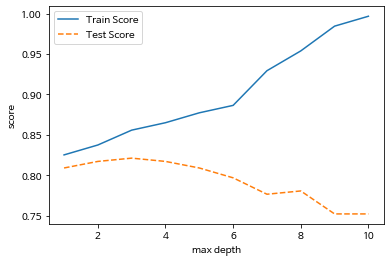

In [21]:
# 모델 설명력 그래프 확인
plt.plot(para_depth,train_score,linestyle='-',label='Train Score')
plt.plot(para_depth,test_score,linestyle='--',label='Test Score')
plt.ylabel('score')
plt.xlabel('max depth')
plt.legend()

# if test score이 더 높다해도 반드시 좋은 것은 아니다. 

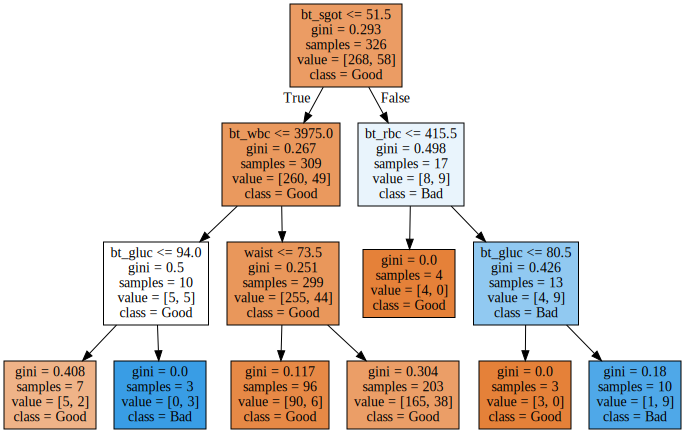

In [22]:
# 변수명 저장 
v_feature_name=df_train_x.columns

# 깊이가 4인 모델 
tree_low=DecisionTreeClassifier(max_depth=3, random_state=1234)
tree_low.fit(df_train_x,df_train_y)

# 트리 모델을 tree_low.dot 파일로 저장 (목표변수 0: Good, 1:Bad) 
export_graphviz(tree_low, out_file="tree_low.dot", class_names=["Good", "Bad"],\
               feature_names=v_feature_name, impurity=True, filled=True)

# graphviz를 이용해 트리 모델 시각화
with open("tree_low.dot") as f: 
    dot_graph=f.read()
display(graphviz.Source(dot_graph))

### 4-2 min_samples_split : 분리 노드의 최소 자료 수 변경에 따른 모델 성능 

In [23]:
# train 밒 test 정확도 결과 저장용 
train_accuracy=[]; test_accuracy=[]

# min_smaples_split: 분할하기 위한 노드의 최소 샘플수 
para_split=[n_split * 10 for n_split in range(1,11)] # 참조 : para_leaf:[10,20,30,...,100]

for v_min_samples_split in para_split:
    tree=DecisionTreeClassifier(random_state=1234,min_samples_split=v_min_samples_split,\
                                max_depth=3)
    tree.fit(df_train_x,df_train_y)
    train_accuracy.append(tree.score(df_train_x,df_train_y))
    test_accuracy.append(tree.score(df_test_x,df_test_y))
    
# 데이터 테이블로 저장 
df_accuracy_split=pd.DataFrame()
df_accuracy_split['MinSamplesLeaf']=para_split
df_accuracy_split['TrainAccuracy']=train_accuracy
df_accuracy_split['TestAccuracy']=test_accuracy

# 모델 정확도 확인 
df_accuracy_split.round(3)

,MinSamplesLeaf,TrainAccuracy,TestAccuracy
0,10,0.856,0.821
1,20,0.825,0.809
2,30,0.825,0.809
3,40,0.825,0.809
4,50,0.825,0.809
5,60,0.825,0.809
6,70,0.825,0.809
7,80,0.825,0.809
8,90,0.825,0.809
9,100,0.825,0.809


In [37]:
# train 밒 test 정확도 결과 저장용 
train_accuracy=[]; test_accuracy=[]

# min_smaples_split: 분할하기 위한 노드의 최소 샘플수 
para_split=[n_split for n_split in range(2,11)] # 참조 : para_leaf:[10,20,30,...,100]

for v_min_samples_split in para_split:
    tree=DecisionTreeClassifier(random_state=1234,min_samples_split=v_min_samples_split,\
                                max_depth=3)
    tree.fit(df_train_x,df_train_y)
    train_accuracy.append(tree.score(df_train_x,df_train_y))
    test_accuracy.append(tree.score(df_test_x,df_test_y))
    
# 데이터 테이블로 저장 
df_accuracy_split=pd.DataFrame()
df_accuracy_split['MinSamplesLeaf']=para_split
df_accuracy_split['TrainAccuracy']=train_accuracy
df_accuracy_split['TestAccuracy']=test_accuracy

# 모델 정확도 확인 
df_accuracy_split.round(3)

,MinSamplesLeaf,TrainAccuracy,TestAccuracy
0,2,0.856,0.821
1,3,0.856,0.821
2,4,0.856,0.821
3,5,0.856,0.821
4,6,0.856,0.821
5,7,0.856,0.821
6,8,0.856,0.821
7,9,0.856,0.821
8,10,0.856,0.821


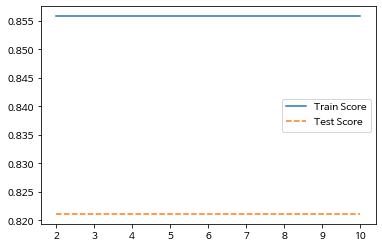

In [38]:
# 모델 설명력 그래프 확인
plt.plot(para_split,train_accuracy,linestyle='-',label='Train Score')
plt.plot(para_split,test_accuracy,linestyle='--',label='Test Score')
plt.legend()

#### 분리 노드의 최소 자료 수 증가에 따라 모델의 정확도는 감소하며, train/test 데이터의 성능 변화를 고려하여 20 선택

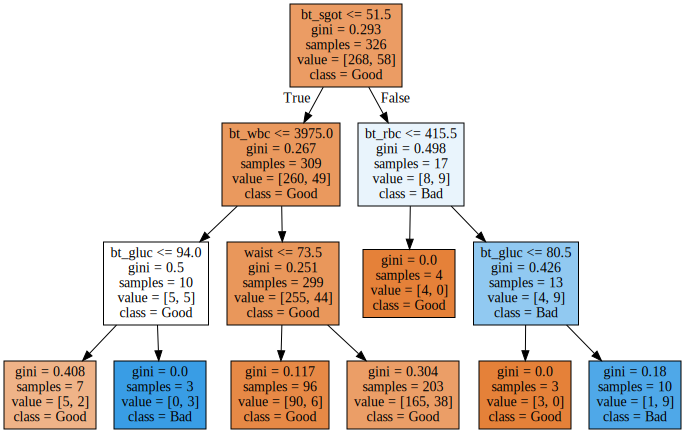

In [25]:
tree_low=DecisionTreeClassifier(random_state=1234,max_depth=3)
tree_low.fit(df_train_x,df_train_y)

export_graphviz(tree_low,out_file='tree_low.dot',class_names=["Good","Bad"],\
               feature_names=v_feature_name,impurity=True,filled=True)

with open('tree_low.dot') as f:
    dot_graph=f.read()
display(graphviz.Source(dot_graph))

### 4-3 min_samples_split : 분리 노드의 최소 자료 수 변경에 따른 모델 성능 

In [26]:
# train 밒 test 정확도 결과 저장용 
train_accuracy=[]; test_accuracy=[]

# min_smaples_split: 분할하기 위한 노드의 최소 샘플수 
para_leaf=[n_leaf * 2 for n_leaf in range(1,11)] # 참조 : para_leaf:[2,4,6,...20]

for v_min_samples_leaf in para_leaf:
    tree=DecisionTreeClassifier(random_state=1234,min_samples_leaf=v_min_samples_leaf,\
                            max_depth=3)
    tree.fit(df_train_x,df_train_y)
    train_accuracy.append(tree.score(df_train_x,df_train_y))
    test_accuracy.append(tree.score(df_test_x,df_test_y))
    
# 데이터 테이블로 저장 
df_accuracy_leaf=pd.DataFrame()
df_accuracy_leaf['MinSamplesLeaf']=para_leaf
df_accuracy_leaf['TrainAccuracy']=train_accuracy
df_accuracy_leaf['TestAccuracy']=test_accuracy

# 모델 정확도 확인 
df_accuracy_leaf.round(3)

,MinSamplesLeaf,TrainAccuracy,TestAccuracy
0,2,0.856,0.821
1,4,0.853,0.817
2,6,0.837,0.809
3,8,0.837,0.809
4,10,0.825,0.809
5,12,0.825,0.809
6,14,0.825,0.809
7,16,0.825,0.809
8,18,0.822,0.837
9,20,0.822,0.837


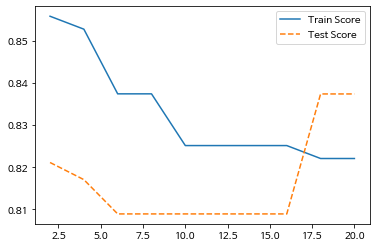

In [27]:
# 모델 설명력 그래프 확인
plt.plot(para_leaf,train_accuracy,linestyle='-',label='Train Score')
plt.plot(para_leaf,test_accuracy,linestyle='--',label='Test Score')
plt.legend()

#### 잎사귀 노드 최소 자료 수 증가에 따라 모델의 정확도는 감소하며 Train/test 데이터의 성능 변화를 고려하여 10을 선택 

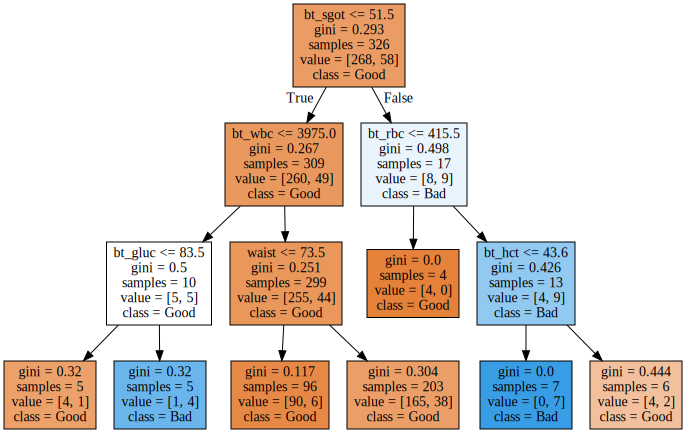

In [39]:
# 잎사귀 노드의 최소 사료 수가 8인 무델 
tree_low=DecisionTreeClassifier(random_state=1234,min_samples_leaf=4,max_depth=3)
tree_low.fit(df_train_x,df_train_y)

export_graphviz(tree_low,out_file='tree_low.dot',class_names=["Good","Bad"],\
               feature_names=v_feature_name,impurity=True,filled=True)

with open('tree_low.dot') as f:
    dot_graph=f.read()
display(graphviz.Source(dot_graph))

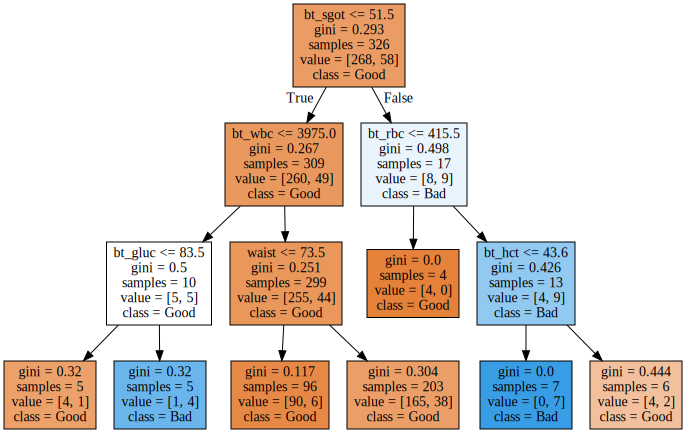

In [29]:
# 잎사귀 노드의 최소 사료 수가 10인 무델 
tree_hign=DecisionTreeClassifier(random_state=1234,min_samples_leaf=4,max_depth=3)
tree_hign.fit(df_train_x,df_train_y)

export_graphviz(tree_hign,out_file='tree_hign.dot',class_names=["Good","Bad"],\
               feature_names=v_feature_name,impurity=True,filled=True)

with open('tree_hign.dot') as f:
    dot_graph=f.read()
display(graphviz.Source(dot_graph))

### 4-4 모델 파라미터 조정 - GridSearchCV를 이용한 최적 parameter 찾기 

In [30]:
estimator=DecisionTreeClassifier()

# 구하고자 하는 parameter와 범위
param_grid={'max_depth':para_depth,'min_samples_leaf':para_leaf,\
            'min_samples_split': para_split}

# 설명력이 높은 최적 parameter 찾기
grid_dt=GridSearchCV(estimator,param_grid,scoring='accuracy',n_jobs=-1)
grid_dt.fit(df_test_x,df_test_y)

print('best estimator model:\n{}'.format(grid_dt.best_estimator_))
print('\nbest parameter:\n{}'.format(grid_dt.best_params_))
print('\nbest score:\n{}'.format(grid_dt.best_score_.round(3)))

best estimator model:
DecisionTreeClassifier(max_depth=1, min_samples_leaf=10, min_samples_split=10)

best parameter:
{'max_depth': 1, 'min_samples_leaf': 10, 'min_samples_split': 10}

best score:
0.837


#### GridSearchCV를 이용하였을 때, 최대 깊이는 2, 잎사귀의 최소 샘플 수가 10일 때 정확도가 92.9%이다. GridSearchCV는 fit을 이용하여 data를 적합시킬 때 train/validation 데이터로 나누어 cross-validation을 적용하므로 앞선 결과와 다를 수 있음

# 3. 결론 도출

### 3-1 최종 모델 선택 

In [40]:
# 최종 모델 
tree_final=DecisionTreeClassifier(random_state=1234, max_depth=3, min_samples_leaf=4)
tree_final.fit(df_train_x,df_train_y)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=4, random_state=1234)

### 3-2 최종 모델 시각화 

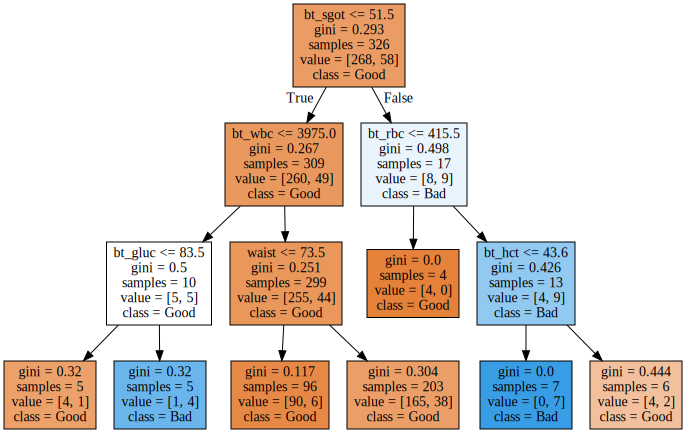

In [41]:
# tree_final.dot으로 결과 저장 
export_graphviz(tree_final, out_file="tree_final.dot", class_names=["Good","Bad"],\
               feature_names=v_feature_name, impurity=True, filled=True)

# tree_final.dot 그리기
with open("tree_final.dot") as f:
    dot_graph=f.read()
display(graphviz.Source(dot_graph))

In [42]:
# 평가 
y_pred=tree_final.predict(df_test_x)
print("Accuracy:{:.3f}".format(tree_final.score(df_train_x,df_train_y)))
print("Accuracy on test set:{:.3f}".format(tree_uncustomized.score(df_test_x,df_test_y)))
print("Confusion matrix:\n{}".format(confusion_matrix(df_test_y,y_pred)))

Accuracy:0.853
Accuracy on test set:0.744
Confusion matrix:
[[199   7]
 [ 38   2]]


### 3-3 feature_importances_ : 설명 중요도

In [46]:
# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance=pd.DataFrame()
df_importance['Feature']=v_feature_name
df_importance['Importance']=tree_final.feature_importances_

# df_feature_importance의 테이블을 중요도별로 정렬
df_importance.sort_values('Importance',ascending=False,inplace=True)
df_importance.round(3)
df_importacne_1=df_importance[0:6]

<ipython-input-47-fc5b5a181af6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_importacne_1.sort_values('Importance',ascending=True,inplace=True)


Text(0, 0.5, '변수')

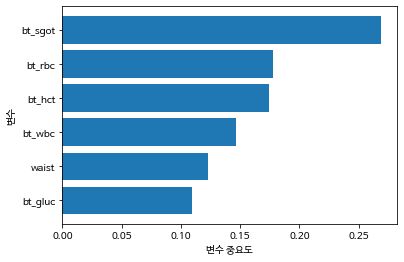

In [47]:
# 설명변수 중요도 그래프
# 중요도가 높은 변수를 상위에 그림
df_importacne_1.sort_values('Importance',ascending=True,inplace=True)
coordinates=range(len(df_importacne_1))
plt.barh(y=coordinates,width=df_importacne_1['Importance'])
plt.yticks(coordinates,df_importacne_1['Feature'])
plt.xlabel('변수 중요도')
plt.ylabel('변수')